# Homework 02 --- Session 3, Multilinear regression

## EX 1 Artificial data (25pt -- 5+5+5+10)
### Dataset 'H31.csv'
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('H31.csv', index_col=0)** )
* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.
* (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.
* (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

In [3]:
import numpy as np   # basic numeric module in python, for array and matrix computation
import pandas as pd  # advanced numeric module, excels in data frame analysis
import matplotlib.pyplot as plt  # for data visualization
%pylab inline
# so the plots are embedded in notebook rather than a stand alone window

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
import statsmodels.formula.api as smf    # for OLS regression


Populating the interactive namespace from numpy and matplotlib


/home/sunglyoung/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
H31 = pd.read_csv('data/H31.csv')
H31.head()

,Unnamed: 0,y,x1,x2,x3
0,1,0,1,-2,1
1,2,2,-1,-1,1
2,3,2,0,0,1
3,4,3,-1,1,1
4,5,3,1,2,1


(a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('H31.csv', index_col=0)** )

x3

(b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.


In [5]:

#Q2. Create X and Y in matrix form then use matrix computation formula to calculate the coefficients
X = np.matrix(H31.loc[:,['x1','x2','x3']])
Y = np.matrix(H31.loc[:,['y']])
w = (X.T * X).I * X.T * Y
print(w)

[[-0.5]
 [ 0.7]
 [ 2. ]]


In [6]:
(X.T*X).I*X.T*Y

matrix([[-0.5],
        [ 0.7],
        [ 2. ]])

In [7]:
Y

matrix([[0],
        [2],
        [2],
        [3],
        [3]])

(c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.

In [8]:
lm1 = smf.ols(formula = 'y ~ x1 + x2 + x3', data = H31).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.983333
Intercept    1.0
x1          -0.5
x2           0.7
x3           1.0
dtype: float64


(d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

In [9]:
H31.describe()

,Unnamed: 0,y,x1,x2,x3
count,5.000000,5.000000,5.0,5.000000,5.0
mean,3.000000,2.000000,0.0,0.000000,1.0
std,1.581139,1.224745,1.0,1.581139,0.0
min,1.000000,0.000000,-1.0,-2.000000,1.0
25%,2.000000,2.000000,-1.0,-1.000000,1.0
50%,3.000000,2.000000,0.0,0.000000,1.0
75%,4.000000,3.000000,1.0,1.000000,1.0
max,5.000000,3.000000,1.0,2.000000,1.0


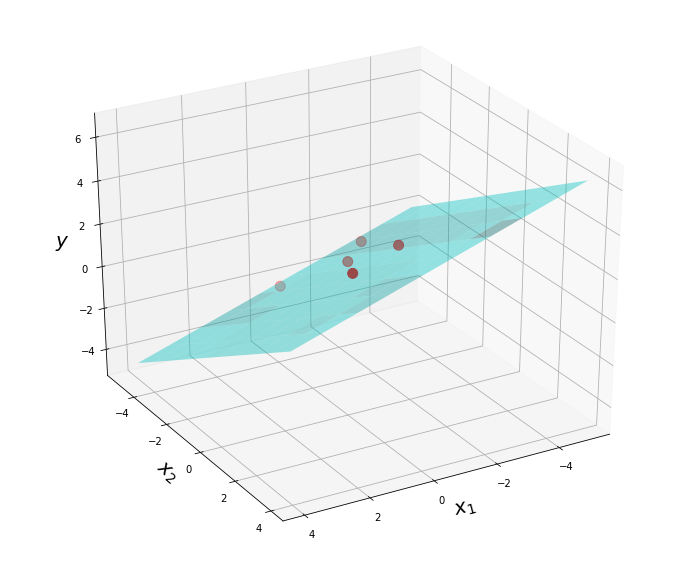

In [10]:
fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(H31.x1, H31.x2, H31.y, s = 100,  c = 'r')
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
radius = 5
x1, x2, = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm1.params[0] + lm1.params[1] * x1 + lm1.params[2] * x2 

#alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x1, x2, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle

## EX 2, Income vs Insurance coverage (35+10pt -- 10+10+5+10+10)
### Dataset 'IncomeInsReg.csv'
You are given the demographic data of insurance coverage in NYC, with the details:
* Zip code
* Per capita income
* Total population (for each zip code)
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage
* Population with No Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information
* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with NO Insurance coverage
    * Population with BOTH types of Insurance coverage
* (c) Drop rows with NaN (if any) and convert all population counts into proportions (percentage of total population, with the form 58.3 instead of 0.583)
* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") to predict income -- What interesting results do we have here? Briefly state what you've obtained.
#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

(a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information

In [11]:
data = pd.read_csv('data/IncomeInsReg.csv')
data.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage
0,10001,77512.0,22767,20809,5800,16795,1958
1,10002,26905.0,79490,70361,40139,35167,9129
2,10003,79088.0,56909,53135,8593,48522,3774
3,10004,98020.0,3024,2780,180,2705,244
4,10005,99633.0,7566,6996,122,6944,570


In [12]:
data.shape

(206, 7)

In [13]:
data['Both'] = (data['Public'] + data['Private'])-data['WithCoverage']

In [14]:
data.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,Both
0,10001,77512.0,22767,20809,5800,16795,1958,1786
1,10002,26905.0,79490,70361,40139,35167,9129,4945
2,10003,79088.0,56909,53135,8593,48522,3774,3980
3,10004,98020.0,3024,2780,180,2705,244,105
4,10005,99633.0,7566,6996,122,6944,570,70


(b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with NO Insurance coverage
    * Population with BOTH types of Insurance coverage


In [15]:
data['Private_Only'] = data['Private']-data['Both']
data['Public_Only'] = data['Public']-data['Both']
data['No_Insurace'] = data['TotalPop']-( data['WithCoverage'])

In [16]:
data.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,Both,Private_Only,Public_Only,No_Insurace
0,10001,77512.0,22767,20809,5800,16795,1958,1786,15009,4014,1958
1,10002,26905.0,79490,70361,40139,35167,9129,4945,30222,35194,9129
2,10003,79088.0,56909,53135,8593,48522,3774,3980,44542,4613,3774
3,10004,98020.0,3024,2780,180,2705,244,105,2600,75,244
4,10005,99633.0,7566,6996,122,6944,570,70,6874,52,570


(c) Drop rows with NaN (if any) and convert all population counts into proportions (percentage of total population, with the form 58.3 instead of 0.583)


In [17]:
data1=(data.iloc[:,3:11])

In [18]:
data =pd.concat([data.iloc[:,0:3], data1],axis = 1, join = 'outer')
data.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,Both,Private_Only,Public_Only,No_Insurace
0,10001,77512.0,22767,20809,5800,16795,1958,1786,15009,4014,1958
1,10002,26905.0,79490,70361,40139,35167,9129,4945,30222,35194,9129
2,10003,79088.0,56909,53135,8593,48522,3774,3980,44542,4613,3774
3,10004,98020.0,3024,2780,180,2705,244,105,2600,75,244
4,10005,99633.0,7566,6996,122,6944,570,70,6874,52,570


(d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") to predict income -- What interesting results do we have here? Briefly state what you've obtained.
    * Total Pop
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with Both
    
    Y  = IncomePerCapita

In [19]:
lm1 = smf.ols(formula = 'IncomePerCapita ~ TotalPop + Private_Only  + Public_Only + Both', data = data).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.348521
Intercept       48818.388834
TotalPop           -0.696163
Private_Only        1.408045
Public_Only        -0.525780
Both               -0.208138
dtype: float64


#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

In [20]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        IncomePerCapita   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     23.54
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           1.33e-15
Time:                        15:04:16   Log-Likelihood:                -2082.5
No. Observations:                 181   AIC:                             4175.
Df Residuals:                     176   BIC:                             4191.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.882e+04   3867.417     12.623      0.000    4.12e+04    5.65e+04
TotalPop        -0.6962      0.603     -1.154      0.250      -1.887       0.495
Private_Only     1.4080      0.671      2.097      0.037       0.083       2.733
Public_Only     -0.5258      0.839     -0.626      0.532      -2.182       1.131
Both            -0.2081      1.647     -0.126      0.900      -3.458       3.042
==============================================================================
Omnibus:                       77.164   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.550
Skew:                           1.813   Prob(JB):                     2.86e-49
Kurtosis:                       7.062   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
data.describe()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,Both,Private_Only,Public_Only,No_Insurace
count,206.000000,181.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,10749.155340,38940.607735,40538.019417,35084.305825,15956.902913,22274.402913,5453.713592,3147.000000,19127.402913,12809.902913,5453.713592
std,580.111558,29842.785729,29167.908167,24786.437004,14344.433394,15445.289344,5474.363119,2313.139933,13458.329814,12693.757664,5474.363119
min,10001.000000,8278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10156.750000,21905.000000,18145.250000,16092.750000,5607.250000,10950.000000,1485.000000,1449.500000,9022.750000,3177.750000,1485.000000
50%,10474.500000,27811.000000,38106.500000,31986.000000,11701.000000,21924.500000,3930.000000,2907.500000,18675.500000,8199.000000,3930.000000
75%,11355.750000,39540.000000,61173.250000,54047.000000,25879.500000,32069.250000,7874.250000,4759.500000,26773.000000,20735.750000,7874.250000
max,11697.000000,173257.000000,109936.000000,88280.000000,63771.000000,71455.000000,37478.000000,9947.000000,61745.000000,56061.000000,37478.000000


In [22]:
lm1.summary()
# lin_model.predict([x.min(), x.max()])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        IncomePerCapita   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     23.54
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           1.33e-15
Time:                        15:04:17   Log-Likelihood:                -2082.5
No. Observations:                 181   AIC:                             4175.
Df Residuals:                     176   BIC:                             4191.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.882e+04   3867.417     12.623      0.000    4.12e+04    5.65e+04
TotalPop        -0.6962      0.603     -1.154      0.250      -1.887       0.495
Private_Only     1.4080      0.671      2.097      0.037       0.083       2.733
Public_Only     -0.5258      0.839     -0.626      0.532      -2.182       1.131
Both            -0.2081      1.647     -0.126      0.900      -3.458       3.042
==============================================================================
Omnibus:                       77.164   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.550
Skew:                           1.813   Prob(JB):                     2.86e-49
Kurtosis:                       7.062   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

TypeError: scatter() got multiple values for keyword argument 's'

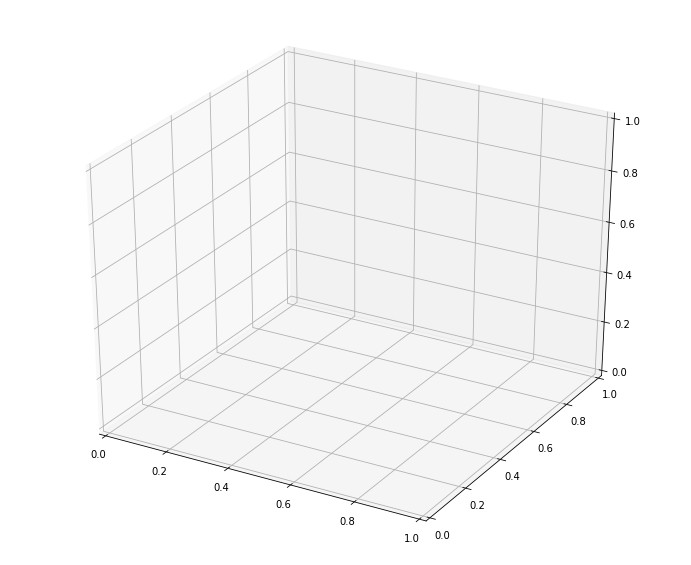

In [23]:

fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(data.IncomePerCapita, data.TotalPop, data.Private_Only, data.Public_Only, data.Both,\
           s = 100,  c = 'r')
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
radius = 5
TotalPop, Private_Only, Public_Only, Both = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm1.params[0] + lm1.params[1] * TotalPop + lm1.params[2] * Private_Only\
+ lm1.params[3] * Public_Only + lm1.params[4] * Both 

#alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(TotalPop, Private_Only, Public_Only, Both, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle

## EX 3, Polynomial fit (40+30pt -- 4+5+3$\times$4+5+3$\times$3+5+30)

### Try to fit y with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ with the given dataset 'H33.csv'

### Tasks:
* (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)
* (b) Create new columns in data frame to contain the information of $x^2, x^3, x^4$
* (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$
* (d) Report the $R^2$, plot it and observe how it changes
* (e) Create a figure with four (4) subfigures, one for each polynomial degree M = 1, 2, 3, 4. In each subfigure:
    * (e.1) Draw the original scatter plot of x1 and y
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve of degree M, observe how our model fits the data as M increases
* (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients $\hat w$
### Extra credit
* (g) In each subfigure:
    * (g.1) Pick an x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error"
    * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten random different future points and predict their values, compare your prediction with the true value), then:
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

(a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)

In [50]:
H33 = pd.read_csv('data/H33.csv')
H33.head()

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22


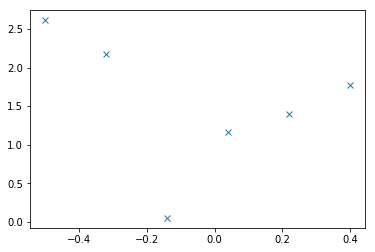

In [51]:
plot(H33.x1, H33.y, 'x')

In [52]:
H33['y2'] = 

SyntaxError: invalid syntax (<ipython-input-52-442ea7c514dd>, line 1)

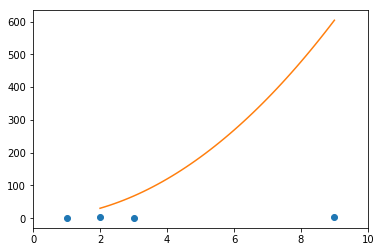

In [62]:

# calculate polynomial
z = np.polyfit(H33.x1, H33.y, 2)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[-1], x[1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

In [63]:
p = np.poly1d(z)

In [64]:
p

poly1d([ 7.4592179 , -0.1128695 ,  0.79787069])

In [65]:
plot(, p)

SyntaxError: invalid syntax (<ipython-input-65-2fc8b80d0494>, line 1)

In [56]:
 H33.x1[0]

-0.5

In [57]:
H33.x1[5]

0.40000000000000002